## 기본 합성곱 신경망 구현

In [2]:
import tensorflow as tf
import numpy as np

## 하이퍼 파라미터

In [3]:
EPOCHS = 10

## 모델 정의

In [3]:
class ConvNet(tf.keras.Model):
    
    def __init__(self):
        super(ConvNet, self).__init__()
        
        # layer을 많이 쌓을거면 다음과 같이하면 편리!
        conv2d = tf.keras.layers.Conv2D
        maxpool = tf.keras.layers.MaxPool2D
        
        self.sequence = list()
        self.sequence.append(conv2d(16, (3, 3), padding='same', activation='relu')) # 28x28x16
        self.sequence.append(conv2d(16, (3, 3), padding='same', activation='relu')) # 28x28x16
        self.sequence.append(maxpool((2,2))) # 14x14x16
        
        self.sequence.append(conv2d(32, (3, 3), padding='same', activation='relu')) # 14x14x32
        self.sequence.append(conv2d(32, (3, 3), padding='same', activation='relu')) # 14x14x32
        self.sequence.append(maxpool((2,2))) # 7x7x32
        
        self.sequence.append(conv2d(64, (3, 3), padding='same', activation='relu')) # 7x7x64
        self.sequence.append(conv2d(64, (3, 3), padding='same', activation='relu')) # 7x7x64
        
        self.sequence.append(tf.keras.layers.Flatten()) # 1568
        self.sequence.append(tf.keras.layers.Dense(128, activation='relu'))
        self.sequence.append(tf.keras.layers.Dense(10, activation='softmax'))

    def call(self, x, training=False, mask=None):
        for layer in self.sequence:
            x = layer(x)
        return x

### 구현 연습
- 아래의 모델 구현해보기!

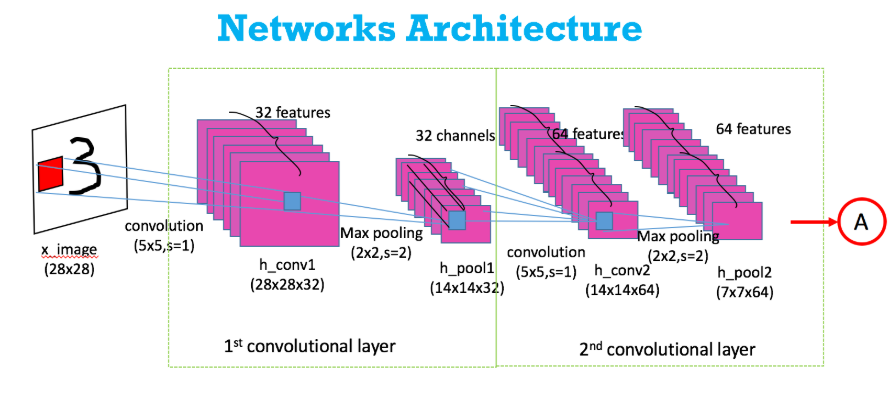

In [4]:
class Conv2(tf.keras.Model):
    def __init__(self):
        super(Conv2,self)._init()
        conv2d = tf.keras.layers.Conv2D
        maxpool = tf.keras.layers.Maxpool2D
        flatten = tf.keras.layers.Flatten
        dense = tf.keras.layers.Dense
        
        # 28*28*3의 input
        self.sequence = list()
        self.sequence.append(conv2d(32,(5,5),padding='same',activation='relu'))
        self.sequence.append(maxpool((2,2)))
        self.sequence.append(conv2d(32,(5,5),padding='same',activation='relu'))
        self.sequence.append(maxpool((2,2)))
        self.sequence.append(flatten())
        self.sequence.append(dense(128,activation='relu'))
        self.sequence.append(dense(10,activation='softmax'))
    
    def call(self,x,training=False,mask=None):
        for layer in self.sequence:
            x=layer(x)
        return(x)

## 학습, 테스트 루프 정의

In [4]:
# Implement training loop
@tf.function
def train_step(model, images, labels, loss_object, optimizer, train_loss, train_accuracy):
    with tf.GradientTape() as tape:
        pred = model(images)
        loss = loss_object(labels, pred)
    grads = tape.gradient(loss, model.trainable_variables)

    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    train_loss(loss)
    train_accuracy(labels, predictions)

# Implement algorithm test
@tf.function
def test_step(model, images, labels, loss_object, test_loss, test_accuracy):
    predictions = model(images)

    t_loss = loss_object(labels, predictions)
    test_loss(t_loss)
    test_accuracy(labels, predictions)

## 데이터셋 준비


In [5]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # normalize

# x_train : (NUM_SAMPLE, 28, 28) -> (NUM_SAMPLE, 28, 28, 1)
# 4차원으로 받아주기 때문에 마지막에 axis 추가

x_train = x_train[..., tf.newaxis].astype(np.float32)
x_test = x_test[..., tf.newaxis].astype(np.float32)

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

## 학습 환경 정의
### 모델 생성, 손실함수, 최적화 알고리즘, 평가지표 정의

In [8]:
# Create model
#model = ConvNet()
model = ConvSH()

# Define loss and optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

# Define performance metrics
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

## 학습 루프 동작

In [9]:
for epoch in range(EPOCHS):
    for images, labels in train_ds:
        train_step(model, images, labels, loss_object, optimizer, train_loss, train_accuracy)

    for test_images, test_labels in test_ds:
        test_step(model, test_images, test_labels, loss_object, test_loss, test_accuracy)

    template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
    print(template.format(epoch + 1,
                          train_loss.result(),
                          train_accuracy.result() * 100,
                          test_loss.result(),
                          test_accuracy.result() * 100))
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

KeyboardInterrupt: 